In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    mean_absolute_error,
    mean_squared_error
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("../data/processed_weather_data.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1656, 5)


,temperature,humidity,pressure,wind_speed,weather
0,-0.154501,-0.881339,0.162686,-0.555270,0
1,-0.676133,0.371485,-0.001287,-0.068962,1
2,-0.330152,-1.140544,-0.001287,0.309847,0
3,-1.253122,1.537908,0.490631,-0.575746,1
4,-0.285441,-0.794937,-0.001287,0.099966,0


In [4]:
X = df.drop("weather", axis=1)
y = df["weather"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


In [5]:
X = df.drop("weather", axis=1)
y = df["weather"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


In [6]:
log_model = LogisticRegression(max_iter=200)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
log_pred = log_model.predict(X_test)
dt_pred  = dt_model.predict(X_test)
rf_pred  = rf_model.predict(X_test)


In [8]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Evaluation")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average="weighted"))
    print("Recall   :", recall_score(y_true, y_pred, average="weighted"))
    print("F1 Score :", f1_score(y_true, y_pred, average="weighted"))

evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)



 Logistic Regression Evaluation
Accuracy : 0.5814889336016097
Precision: 0.5729892134763468
Recall   : 0.5814889336016097
F1 Score : 0.5702726706147325

 Decision Tree Evaluation
Accuracy : 0.7766599597585513
Precision: 0.7820143412227011
Recall   : 0.7766599597585513
F1 Score : 0.7766697763422296

 Random Forest Evaluation
Accuracy : 0.7987927565392354
Precision: 0.7996051927769038
Recall   : 0.7987927565392354
F1 Score : 0.7986054339107262


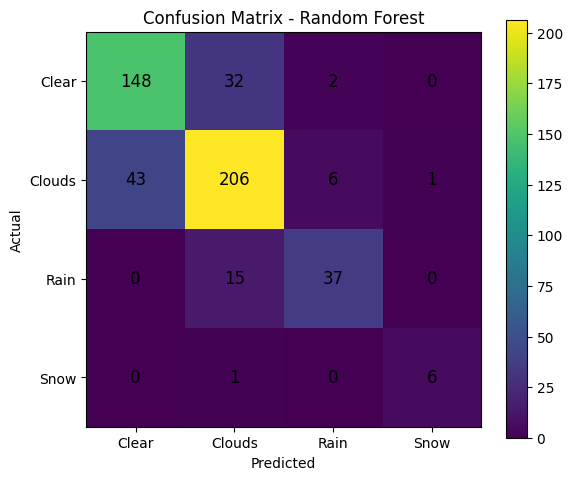

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()

classes = ["Clear", "Clouds", "Rain", "Snow"]  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="black", fontsize=12)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [10]:
mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("MAE :", mae)
print("RMSE:", rmse)


MAE : 0.20925553319919518
RMSE: 0.47471266327754136


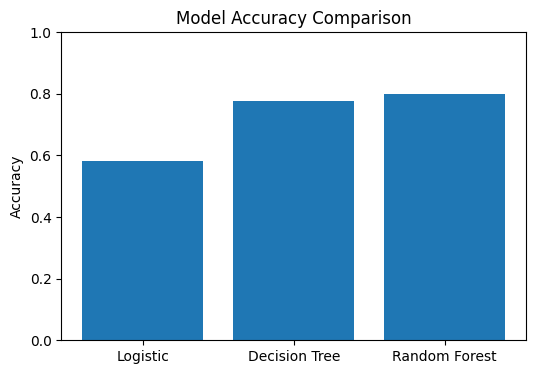

In [11]:
models = ["Logistic", "Decision Tree", "Random Forest"]
accuracies = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred)
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


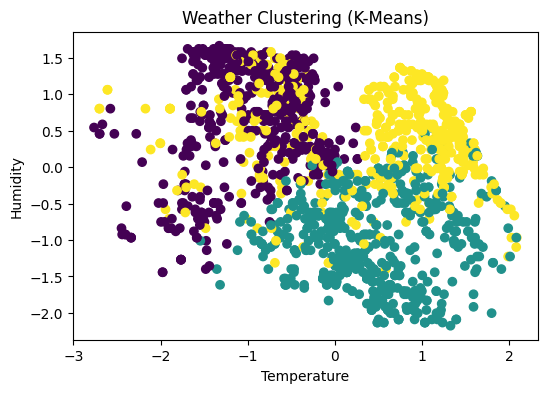

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(df["temperature"], df["humidity"], c=df["cluster"])
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Weather Clustering (K-Means)")
plt.show()
